In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from copy import deepcopy
import random

In [20]:
df_bio = pd.read_csv('../data/column_2C_weka.csv')
df_bio.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


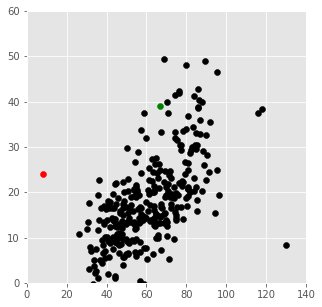

In [28]:
np.random.seed(100)
k = 2
centroids = {
    i+1: [np.random.randint(0, 140), np.random.randint(0, 60)]
    for i in range(k)
}
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_bio['pelvic_incidence'], df_bio['pelvic_tilt numeric'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 140)
plt.ylim(0, 60)
plt.show()

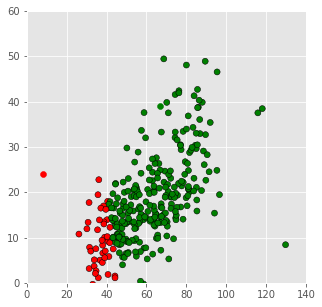

In [31]:
def assignment(df_bio, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df_bio['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df_bio['pelvic_incidence'] - centroids[i][0]) ** 2
                + (df_bio['pelvic_tilt numeric'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df_bio['closest'] = df_bio.loc[:, centroid_distance_cols].idxmin(axis=1)
    df_bio['closest'] = df_bio['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df_bio['color'] = df_bio['closest'].map(lambda x: colmap[x])
    return df_bio

df_bio = assignment(df_bio, centroids)
#print(df_bio.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df_bio['pelvic_incidence'], df_bio['pelvic_tilt numeric'], color=df_bio['color'], edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 140)
plt.ylim(0, 60)
plt.show()

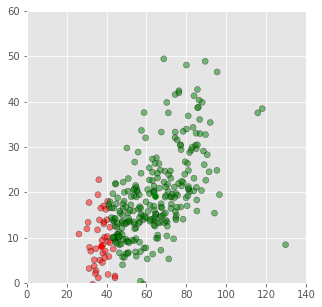

In [34]:
import copy
old_centroids = copy.deepcopy(centroids)

def updateCentroids(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df_bio[df_bio['closest'] == i]['pelvic_incidence'])
        centroids[i][1] = np.mean(df_bio[df_bio['closest'] == i]['pelvic_tilt numeric'])
    return k

centroids = updateCentroids(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df_bio['pelvic_incidence'], df_bio['pelvic_tilt numeric'], color=df_bio['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 140)
plt.ylim(0, 60)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
plt.show()

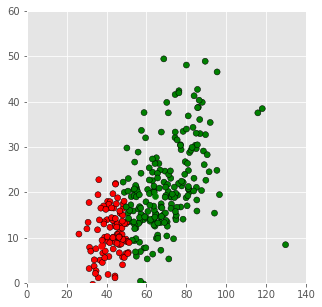

In [35]:
df_bio = assignment(df_bio, centroids)


fig = plt.figure(figsize=(5, 5))
plt.scatter(df_bio['pelvic_incidence'], df_bio['pelvic_tilt numeric'], color=df_bio['color'], edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 140)
plt.ylim(0, 60)
plt.show()

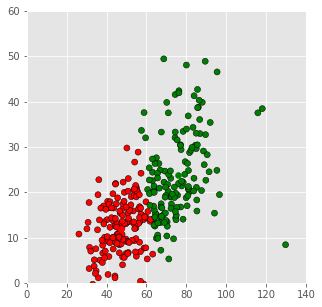

In [38]:
while True:
    closest_centroids = df_bio['closest'].copy(deep=True)
    centroids = updateCentroids(centroids)
    df_bio = assignment(df_bio, centroids)
    if closest_centroids.equals(df_bio['closest']):
        break
        
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_bio['pelvic_incidence'], df_bio['pelvic_tilt numeric'], color=df_bio['color'], edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 140)
plt.ylim(0, 60)
plt.show()